<a href="https://colab.research.google.com/github/nilabja10201992/Cryptocurrency-Price-Prediction/blob/ajay_branch/using_close_and_volume_attribute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.2MB/s 


In [0]:
link = 'https://drive.google.com/open?id=13WpQRYkUI61b2YjraEOddCS_N3Bcb5Rh'

In [20]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

13WpQRYkUI61b2YjraEOddCS_N3Bcb5Rh


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')  
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [30]:
print(list(df.columns), "\nSHAPE ::", df.shape)
for i in df.columns:
    print(i, "::", df[i].dtype)

# Declaring number for random state for reproducibility
rstate=123
    
df.describe()

['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'] 
SHAPE :: (3778817, 8)
Timestamp :: int64
Open :: float64
High :: float64
Low :: float64
Close :: float64
Volume_(BTC) :: float64
Volume_(Currency) :: float64
Weighted_Price :: float64


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.778817e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06
mean,1.438908e+09,2.654668e+03,2.656783e+03,2.652286e+03,2.654650e+03,1.068140e+01,2.395856e+04,2.654510e+03
std,6.561491e+07,3.529553e+03,3.533184e+03,3.525347e+03,3.529522e+03,3.476243e+01,8.829950e+04,3.529271e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.382000e+09,3.489800e+02,3.491500e+02,3.487800e+02,3.489900e+02,4.500000e-01,2.480382e+02,3.489681e+02
50%,1.439071e+09,6.595600e+02,6.600000e+02,6.589900e+02,6.596200e+02,2.095163e+00,1.814312e+03,6.595521e+02
75%,1.495753e+09,4.045492e+03,4.049115e+03,4.042050e+03,4.045400e+03,8.284949e+00,1.303504e+04,4.045115e+03
max,1.552435e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


In [0]:
a = df[["Close","Volume_(BTC)"]].fillna(method="backfill")

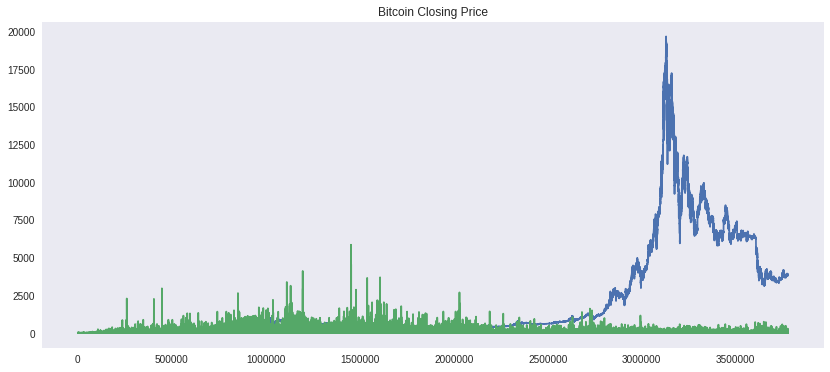

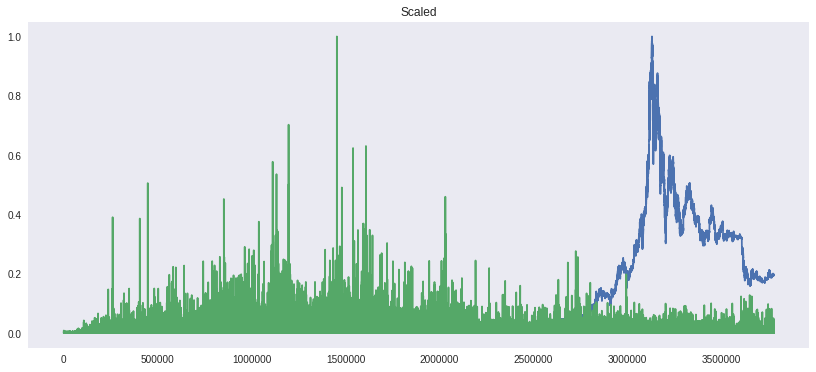

In [35]:
close_price = np.array(a).reshape(-1,2)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [36]:
X = []
y = []
for i in range(60, len(close_priceSC)):
    X.append(close_priceSC[i-60:i, 0:2])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)


(3778757, 60, 2) (3778757,)


In [42]:
print(X.shape)
print(y.shape)

(3778757, 60, 2)
(3778757,)


In [50]:
X_train = X[:3300000,:]
X_test = X[3300000:,:]

y_train = y[:3300000]
y_test = y[3300000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3300000, 60, 2)
(478757, 60, 2)
(3300000,)
(478757,)


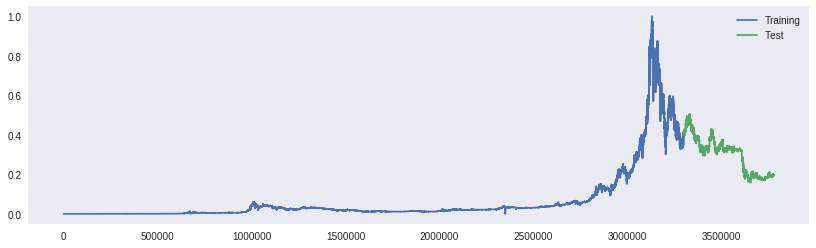

In [51]:
plt.figure(figsize=(14,4))
plt.plot(range(3300000),y_train)
plt.plot(range(3300000, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [0]:
X_train = X_train.reshape(-1,60,2)
X_test = X_test.reshape(-1,60,2)

In [53]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],2)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=1, batch_size=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
3300000/3300000 [==============================] - 3176s 962us/step - loss: 0.0078
CPU times: user 1h 10min 1s, sys: 7min 22s, total: 1h 17min 23s
Wall time: 53min


In [55]:
%%time
y_pred = regressor.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(478757, 1)
(478757,)
CPU times: user 1h 3min 21s, sys: 6min 20s, total: 1h 9min 41s
Wall time: 43min 15s


In [0]:
y_pred=np.squeeze(y_pred)

In [59]:
y_pred.shape

(478757,)

In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += y_true[i+1] - y_true[i]
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [60]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.0067132020447204085

In [64]:
zero_arr=np.zeros(len(y_test))
zero_arr.shape

(478757,)

In [65]:
y_pred1=np.column_stack((y_pred,zero_arr))
y_test1=np.column_stack((y_test,zero_arr))
print(y_pred1.shape)
print(y_test1.shape)


(478757, 2)
(478757, 2)


In [0]:
y_pred_rescaled=sc.inverse_transform(y_pred1.reshape(-1,2))
y_test_rescaled=sc.inverse_transform(y_test1.reshape(-1,2))

In [0]:
y_pred_rescaled=np.delete(y_pred_rescaled,1,1)
y_test_rescaled=np.delete(y_test_rescaled,1,1)

Text(0, 0.5, 'Price')

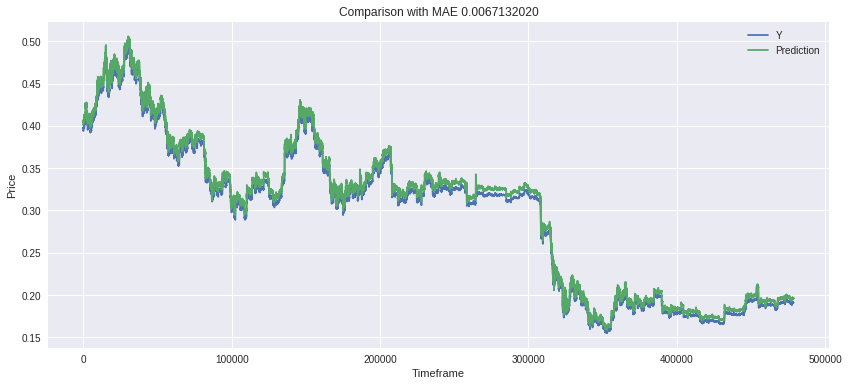

In [73]:
plt.figure(figsize=(14,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.title("Comparison with MAE {0:0.10f}".format(MAE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [70]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

4.705392406160036e-05

In [71]:
SMAPE = systematic_mean_absolute_percentage_error(y_test, y_pred)
SMAPE

2.34622407593376

Text(0, 0.5, 'Price')

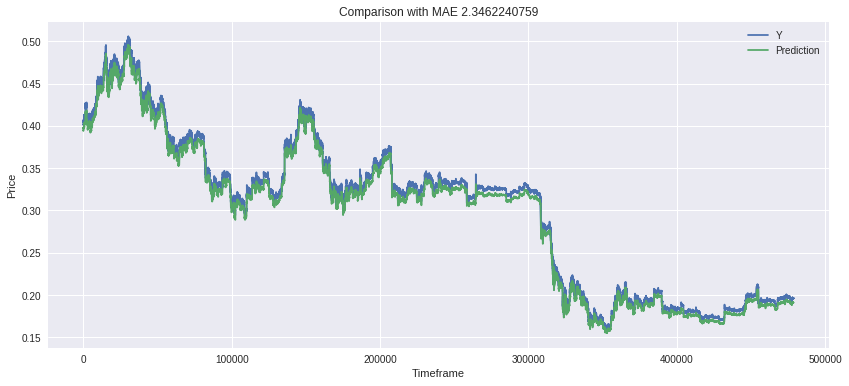

In [72]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(SMAPE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [75]:
MASE = mean_absolute_scaled_error(y_test, y_pred)
MASE

-0.032691623487605494

Text(0, 0.5, 'Price')

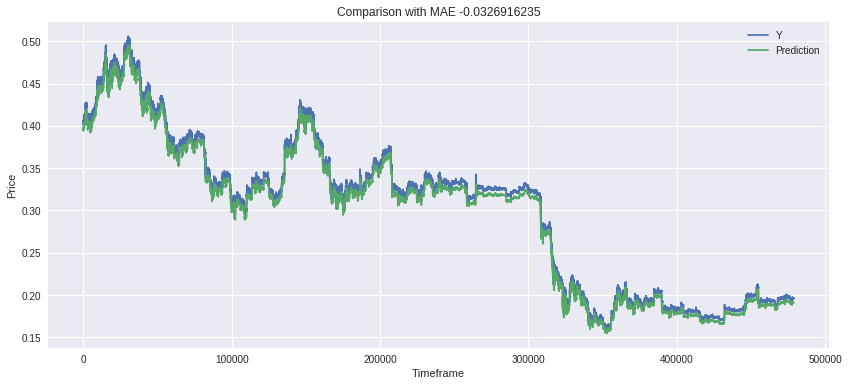

In [76]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(MASE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")